In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_files
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import csv

# Testing with Mean values for NA

In [6]:
data_1 = pd.read_excel('time_stamp_mean_data.xlsx')

In [7]:
data_1.head()

,Time Stamp,PM_US Post
0,2010-01-01 00:00:00,95.904241
1,2010-01-01 01:00:00,95.904241
2,2010-01-01 02:00:00,95.904241
3,2010-01-01 03:00:00,95.904241
4,2010-01-01 04:00:00,95.904241


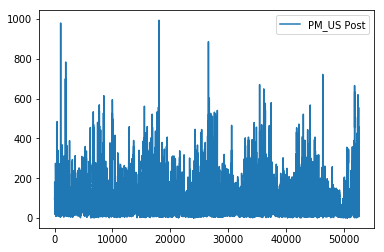

In [19]:
data_1.plot()

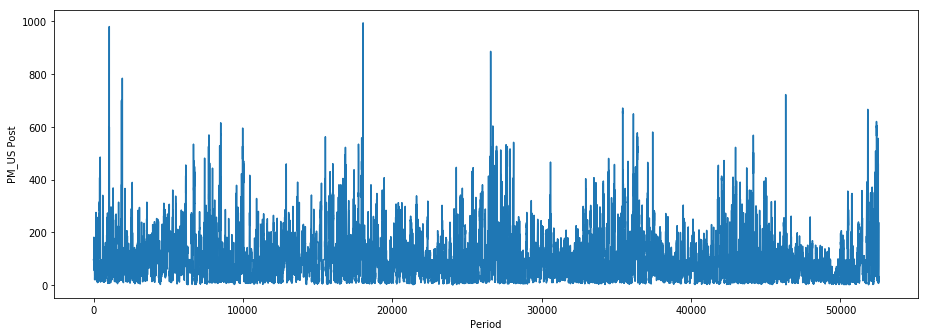

In [71]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([.5, .5, 2, 1]) # left, bottom, width, height (range 0 to 1)


plt.plot(data_1['PM_US Post']) # 'r' is the color red
plt.xlabel('Period')
plt.ylabel('PM_US Post')
#plt.title('String Title Here')
plt.show()

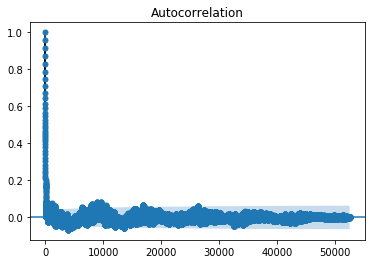

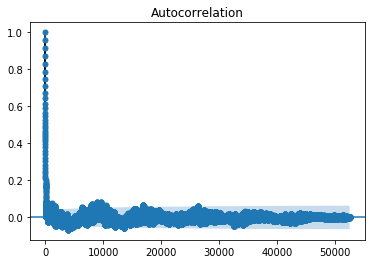

In [38]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_1['PM_US Post'])

In [149]:
len(data_1)

52584

In [150]:
X = data_1['PM_US Post']

In [151]:
train , test = X.values[:40000], X.values[40000:]

## Model

In [152]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [153]:
model = AR(train)
model_fit = model.fit(maxlag=1)
window = model_fit.k_ar
coef = model_fit.params

In [154]:
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)

In [155]:
for i in range(10):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=33.881653, expected=38.000000
predicted=40.585087, expected=45.000000
predicted=47.288521, expected=44.000000
predicted=46.330887, expected=55.000000
predicted=56.864855, expected=61.000000
predicted=62.610655, expected=69.000000
predicted=70.271723, expected=69.000000
predicted=70.271723, expected=72.000000
predicted=73.144623, expected=87.000000
predicted=87.509124, expected=91.000000


In [156]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 488.039


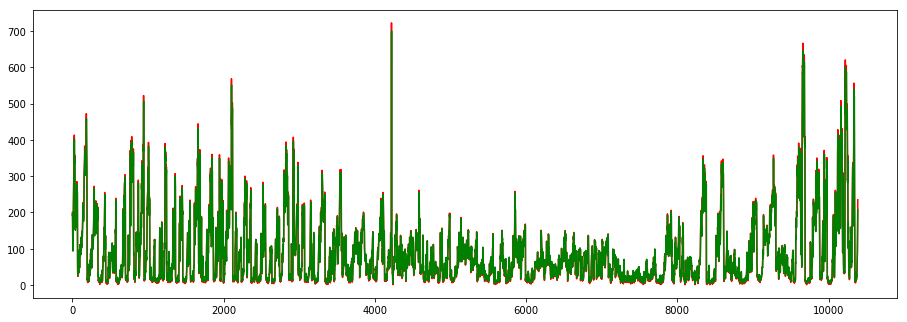

In [125]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([.5, .5, 2, 1]) # left, bottom, width, height (range 0 to 1)


plt.plot(test, color='red')
plt.plot(predictions, color='green')
plt.show()

download image for more clarity
and observe the green color(predicted) overlapping red colour(our dataset)

# Testing after dropping NA

In [107]:
data_2 = pd.read_excel('time_stamp_data.xlsx')

In [110]:
data_2.dropna(inplace=True)

In [111]:
data_2.head()

,Time Stamp,PM_US Post
23,2010-01-01 23:00:00,129.0
24,2010-01-02 00:00:00,148.0
25,2010-01-02 01:00:00,159.0
26,2010-01-02 02:00:00,181.0
27,2010-01-02 03:00:00,138.0


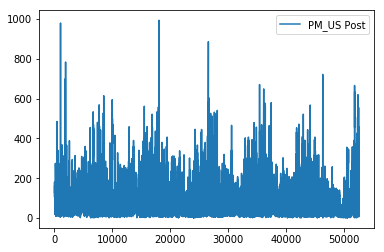

In [112]:
data_2.plot()

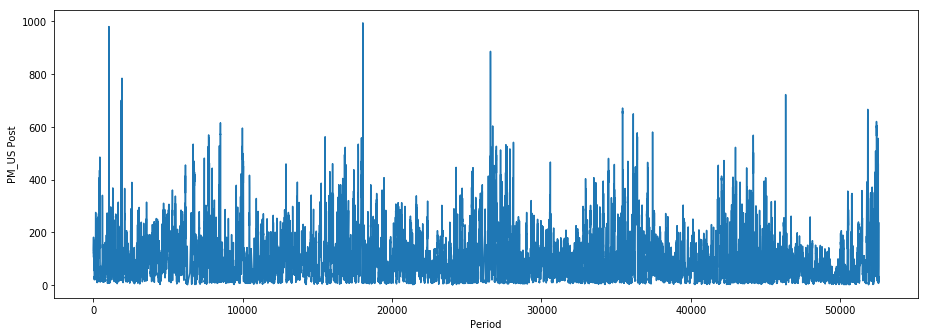

In [113]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([.5, .5, 2, 1]) # left, bottom, width, height (range 0 to 1)


plt.plot(data_2['PM_US Post']) # 'r' is the color red
plt.xlabel('Period')
plt.ylabel('PM_US Post')
#plt.title('String Title Here')
plt.show()

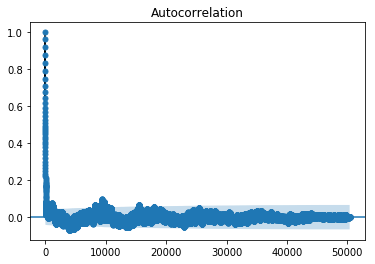

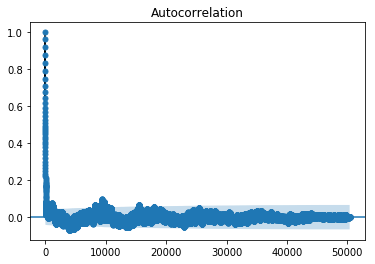

In [116]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_2['PM_US Post'])

In [118]:
len(data_2)

50387

In [117]:
X = data_2['PM_US Post']

In [127]:
train , test = X.values[:40000], X.values[40000:]

## Model

In [129]:
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

In [144]:
test

array([200., 197., 193., ..., 203., 212., 235.])

In [146]:
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)


In [148]:
for i in range(10):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

predicted=190.481842, expected=200.000000
predicted=196.748479, expected=197.000000
predicted=191.335663, expected=193.000000
predicted=185.909386, expected=180.000000
predicted=172.979571, expected=117.000000
predicted=103.555609, expected=110.000000
predicted=109.571809, expected=111.000000
predicted=109.540325, expected=94.000000
predicted=89.226065, expected=112.000000
predicted=114.915370, expected=110.000000


In [131]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 449.764


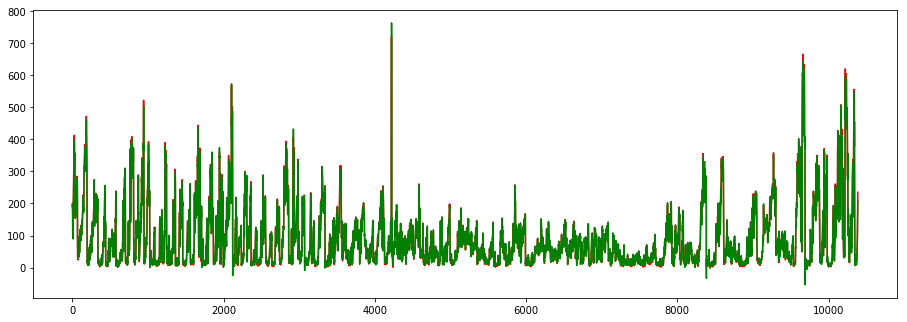

In [134]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([.5, .5, 2, 1]) # left, bottom, width, height (range 0 to 1)


plt.plot(test, color='red')
plt.plot(predictions, color='green')
plt.show()